<a href="https://colab.research.google.com/github/harim4422/tensorflow2_deeplearning/blob/master/regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

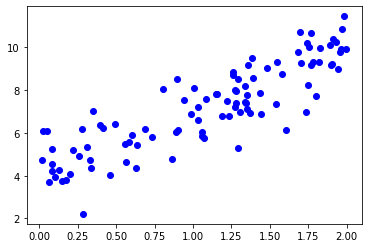

In [0]:
plt.plot(x, y, 'bo')
plt.show()

# Numpy로 Linear Regression

a: [2.88271234] b: [4.07837097]


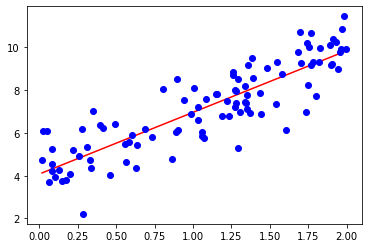

In [0]:
x_mean = sum(x) / len(x)
y_mean = sum(y) / len(y)

a = sum([(x_ - x_mean) * (y_ - y_mean) for x_, y_ in list(zip(x, y))])
a /= sum([(x_ - x_mean) ** 2 for x_ in x])
b = y_mean - a * x_mean
print('a:', a, 'b:', b)

x_pred = np.arange(min(x), max(x), 0.01)
y_pred = a * x_pred + b

plt.plot(x_pred, y_pred, 'r-')
plt.plot(x,y,'bo')
plt.show()

# Tensorflow로 Linear Regression

In [0]:
import random

w = tf.Variable(random.random())
b = tf.Variable(random.random())

def residue():
  y_pred = w * x + b
  loss = tf.reduce_mean((y - y_pred) ** 2)
  return loss

optimizer = tf.optimizers.Adam(lr=0.07)
for i in range(1000):
  optimizer.minimize(residue, var_list=[w,b])

  if i % 100 == 99:
    print(i, 'w:', w.numpy(), 'b:', b.numpy(), 'loss:', residue().numpy())

99 w: 3.3649647 b: 3.5312543 loss: 1.1030277
199 w: 3.1546128 b: 3.7345388 loss: 1.0463868
299 w: 3.018664 b: 3.906372 loss: 1.0241587
399 w: 2.9404671 b: 4.005304 loss: 1.0180821
499 w: 2.9036736 b: 4.051852 loss: 1.0169202
599 w: 2.8892155 b: 4.0701437 loss: 1.016761
699 w: 2.88443 b: 4.076198 loss: 1.0167451
799 w: 2.883097 b: 4.077884 loss: 1.016744
899 w: 2.8827848 b: 4.07828 loss: 1.016744
999 w: 2.8827243 b: 4.0783553 loss: 1.016744


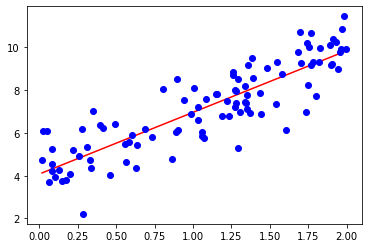

In [0]:
x_pred = np.arange(min(x), max(x), 0.01)
y_pred = w * x_pred + b

plt.plot(x_pred, y_pred, 'r-')
plt.plot(x, y, 'bo')
plt.show()

# sklearn로 Regression

In [0]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x, y)
print(lin_reg.intercept_, lin_reg.coef_)

[4.07837097] [[2.88271234]]


In [0]:
x_b = np.c_[np.ones((100, 1)), x]
theta_b = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
print(theta_b)

[[4.07837097]
 [2.88271234]]


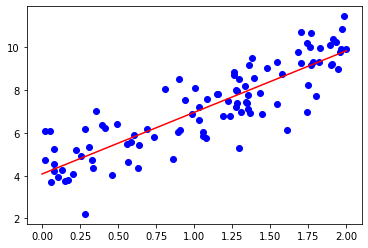

In [0]:
x_pred = np.array([[0], [2]])
y_pred = lin_reg.predict(x_pred)

plt.plot(x, y, 'bo')
plt.plot(x_pred, y_pred, 'r-')
plt.show()

In [0]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


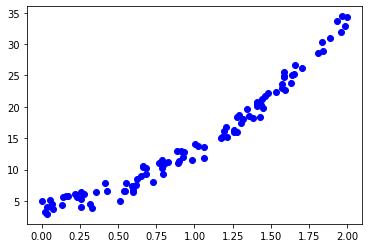

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

x = 2 * np.random.rand(100, 1)
y = 6 * x**2 + 3 * x + 4 + np.random.randn(100, 1)
plt.plot(x, y, 'bo')
plt.show()

In [0]:
import random

w = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

def residue():
  y_pred = w * x**2 + b * x + c
  loss = tf.reduce_mean((y - y_pred) ** 2)
  return loss

optimizer = tf.optimizers.Adam(lr=0.07)
for i in range(1000):
  optimizer.minimize(residue, var_list=[w,b,c])

  if i % 100 == 99:
    print(i, 'w:', w.numpy(), 'b:', b.numpy(), 'c:', c.numpy(), 'loss:', residue().numpy())

99 w: 4.488907 b: 4.2656493 c: 4.877994 loss: 1.9493985
199 w: 4.8171506 b: 4.350337 c: 4.4765873 loss: 1.3733585
299 w: 5.0291886 b: 4.3406863 c: 4.0960383 loss: 1.131375
399 w: 5.1746855 b: 4.310568 c: 3.8636954 loss: 1.048434
499 w: 5.266534 b: 4.263898 c: 3.751948 loss: 1.0246763
599 w: 5.326107 b: 4.2054825 c: 3.7150164 loss: 1.0161349
699 w: 5.3703814 b: 4.139194 c: 3.7164593 loss: 1.0103642
799 w: 5.4091444 b: 4.0675817 c: 3.7348676 loss: 1.0049325
899 w: 5.4468184 b: 3.9922056 c: 3.7600534 loss: 0.9995567
999 w: 5.484923 b: 3.9140928 c: 3.7878945 loss: 0.9942758


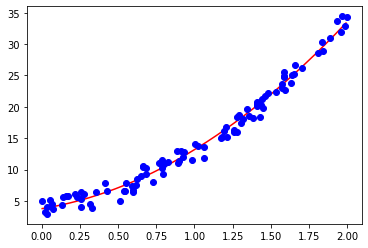

In [0]:
x_pred = np.arange(min(x), max(x), 0.01)
y_pred = w * x_pred * x_pred + b * x_pred + c

plt.plot(x_pred, y_pred, 'r-')
plt.plot(x, y, 'bo')
plt.show()

In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree = 2, include_bias=True)
x_poly = poly_features.fit_transform(x)

lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

[4.30839901] [[0.         2.48175671 6.17826713]]


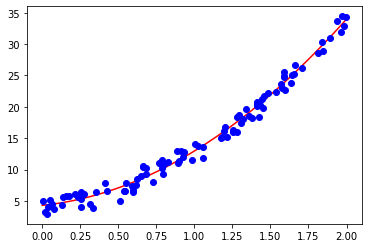

In [0]:
x_new = np.linspace(0, 2, 100).reshape(100,1)
x_new_poly = poly_features.transform(x_new)
y_predict = lin_reg.predict(x_new_poly)

plt.plot(x_new, y_predict, "r-")
plt.plot(x, y, "bo")
plt.show()